# Capstone Project - The Battle of the Neighborhoods

## 1. Introduction

#### St. Louis locates in the Mid-west of the Unites States, which is the largest metropolitan area in the state of Missouri. Due to the city history, it has a great many traditional American-style restaurants. However, with the city development, multi-cultured people are attracted to St. Louis, which increases the demand for the diversity of its food culture. Among the different styles of dishes, Asian food, especially Chinese food, is one of the popular options. Panda Express is a famous American-style Chinese fast food, which has over 20 stores in St. Louis. American-style Chinese food is the major Chinese restaurant in St. Louis area. Presently, more and more people would like to try authentic Chinese food, which leads to a good potential market in this area.

#### In this project, we will try to find optimal location candidates in St. Louis for the stakeholders that interest in opening an Authentic Chinese restaurant. To ensure the profit of the stakeholders, the selection of location prefers in a prospective area with few competitors.

## 2. Data

#### There are total 79 neighborhoods in St. Louis. Based on the target, the location selection should consider the following factors:
#### i.	The population of the neighborhood;
#### ii.	The existing restaurants in the neighborhood;
#### iii.	The shops near the neighborhood.

#### Based on the factors, the data that will be used in this analysis are listed below:
#### i.	The list of neighborhoods in St. Louis from Wikipedia;
#### ii.	The address of the neighborhoods will be obtained by using St. Louis Coordinate Datasheet;
#### iii.	The number and types of restaurants will be obtained by using Foursquare API
#### iv.	The number of shops will be obtained by using Foursquare API.

# 3. Methodology

Before processing the data for the St. Louis Neighborhoods, the libraries are improted.

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

!conda install -c conda-forge folium=0.5.0 --yes
import folium 
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


### Import and visualize the neighborhood information of St. Louis 

#### Data Preparation.

Firstly, import the list of neighborhoods of St. Louis from Wikipedia.

In [3]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighborhoods_of_St._Louis')
df1 = dfs[1]
df1.head()

,Neighborhood,Population,White,Black,Hispanic/Latino2,AIAN1,Asian,Mixed Race,Corridor
0,Academy,3006,16.9,54.7,20.5,1.52,4.3,3.5,North
1,Baden,7268,6.3,91.8,0.5,0.10,0.0,1.3,North
2,Benton Park,3532,68.2,25.1,3.2,0.30,1.2,3.8,South
3,Benton Park West,4404,28.0,59.6,10.5,0.00,1.9,5.1,South
4,Bevo Mill,12654,74.2,13.8,7.5,0.40,4.6,3.9,South


Since only the neighbood and the population are the factors we care in the study, the other unnecessary columns need to be deleted.

In [4]:
df2 = df1.drop(['Black', 'White','Hispanic/Latino2', 'AIAN1', 'Asian', 'Mixed Race', 'Corridor'], axis=1)
df2.head()

,Neighborhood,Population
0,Academy,3006
1,Baden,7268
2,Benton Park,3532
3,Benton Park West,4404
4,Bevo Mill,12654


Derive the coordinate data of St. Louis neighborhood from datasheet.

In [5]:
df_cord = pd.read_csv (r"F:\Han_Simulations\IBM_Data_Science\Course 9\Week 4\StLouis_Address.csv")
df_cord.head()

,Neighborhood,Latitude,Longitude
0,Academy,38.6553,-90.2690
1,Baden,38.7183,-90.2315
2,Benton Park,38.6001,-90.2205
3,Benton Park West,38.5990,-90.2303
4,Bevo Mill,38.5845,-90.2667


Merge the table containing neighborhood, population, and coordinates. 

In [6]:
df3 = pd.merge(df2, df_cord, on='Neighborhood')
df3.head()

,Neighborhood,Population,Latitude,Longitude
0,Academy,3006,38.6553,-90.2690
1,Baden,7268,38.7183,-90.2315
2,Benton Park,3532,38.6001,-90.2205
3,Benton Park West,4404,38.5990,-90.2303
4,Bevo Mill,12654,38.5845,-90.2667


Get the size of the dataframe.

In [7]:
df3.shape

(79, 4)

#### Explore the neighborhood in St. Louis using Foursquare API

Import the libraries.

In [8]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


Get the coordinates of St. Louis by using the geolocoder.

In [9]:
# Geograpical coordinate of St. Louis
address = 'St. Louis, MO, USA'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of St. Louis, MO are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of St. Louis, MO are 38.6264178, -90.1998378.


The visualization of the neighborhoods in St. Louis is shown in the figure. 

In [103]:
# create map of St. Louis using latitude and longitude values
map_stl = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df3['Latitude'], df3['Longitude'], df3['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stl)  
    
map_stl

## 4. Results and Discussion

### 4.1 Explore the neighborhoods in St. Louis

The objective of this study is selected the optimum locatation for the stockholders to open a new Chinese restaurant. The factors may influence the selection of location is 1) the population of neighborhoods, which is fixed population; 2) the shopping malls in the neighborhoods, which affects the floating population; 3) the present restaurants, especially Chinese restaurants. In this section, we will explore the 79 neighborhood communities of St. Louis based on the above three parameters.

#### Filter the neighborhood communities by the population

In [11]:
df4 = df3.sort_values(by='Population', ascending=False)
df4.head()

,Neighborhood,Population,Latitude,Longitude
19,Dutchtown,15770,38.5819,-90.2456
9,Central West End,14473,38.6396,-90.2550
70,Tower Grove South,13333,38.5975,-90.2561
4,Bevo Mill,12654,38.5845,-90.2667
43,Lindenwood Park,9486,38.5983,-90.3085


The population ranges from 15,770 to 14 people for the 79 neighborhood communities in St. Louis. Analyzing the distribution of the population.

In [12]:
df4['Population'].describe()

count       79.000000
mean      4044.075949
std       3212.850207
min         14.000000
25%       1868.500000
50%       3349.000000
75%       5604.500000
max      15770.000000
Name: Population, dtype: float64

In [13]:
df4['Population'].value_counts(bins=8)

(1983.5, 3953.0]      27
(-1.757, 1983.5]      23
(3953.0, 5922.5]      13
(5922.5, 7892.0]       9
(7892.0, 9861.5]       3
(13800.5, 15770.0]     2
(11831.0, 13800.5]     2
(9861.5, 11831.0]      0
Name: Population, dtype: int64

In [14]:
import matplotlib.pyplot as plt

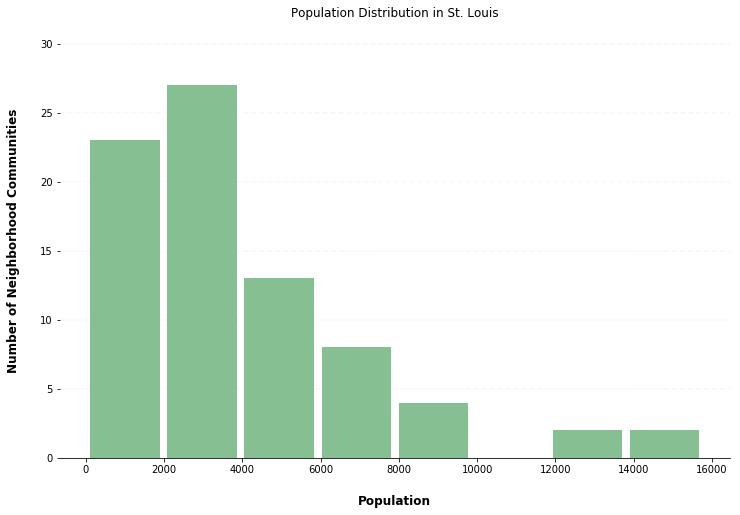

In [15]:
ax = df4.hist(column='Population', bins=8, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Population Distribution in St. Louis")

    # Set x-axis label
    x.set_xlabel("Population", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of Neighborhood Communities", labelpad=20, weight='bold', size=12)

The above histogram clearly shows that population in the range of 2000 to 4000 people has the most communities (27 communities). Only four communities have the population larger than 10,000. The mean population is around 4000. Since the objective is open a Chinese restaurant in a certain neighborhood community, the population needs to reach a minimum value to ensure that the potential customer is reasonable. Based on this rule, we neglect the communties that have population less than 2000.

In [16]:
df5 = df4[~(df4['Population'] <= 2000)]
df5.tail()

,Neighborhood,Population,Latitude,Longitude
25,Franz Park,2442,38.6237,-90.3066
57,Peabody Darst Webbe,2378,38.6153,-90.2060
11,Clayton-Tamm,2251,38.6286,-90.2929
32,Hi-Pointe,2196,38.6303,-90.3031
40,Lafayette Square,2078,38.6174,-90.2139


In [17]:
df5.shape

(56, 4)

### 4.2 Filter the neighborhoods by shops in St. Louis

In the previous study, we filter the neighborhoods with a certain amount of population (fixed population). The next step is studying on the floating population. Here, we focus on the people influenced by the shopping malls. 

Define Foursquare Credentials and Version

In [ ]:
## pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install

In [18]:
CLIENT_ID = 'XA2HLRTH5NUIAGYWBKS5N5VZ4ORJK52EK2MJIZWNONLPR5IW' # your Foursquare ID
CLIENT_SECRET = 'ZQZJZA3WZXICFVJDLWNVJ3PH5CXJ1XXEKXXWR3BSHEFKO10V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Define a function to explore the venues of all the neighborhoods

In [19]:
LIMIT = 100 #limit of no. of venues
radius = 500 #define radius

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create a datafram to show the venues of the communities.

In [21]:
stl_venues = getNearbyVenues(names=df5['Neighborhood'],
                                   latitudes=df5['Latitude'],
                                   longitudes=df5['Longitude']
                                  )
print(stl_venues.shape)
stl_venues.head()

Dutchtown
Central West End
Tower Grove South
Bevo Mill
Lindenwood Park
Boulevard Heights
Carondelet
North Hampton
Princeton Heights
St. Louis Hills
Baden
South Hampton
Shaw
West End
Penrose
Greater Ville
Wells/Goodfellow
Tower Grove East
O’Fallon
Midtown
JeffVanderLou
Gravois Park
Southwest Garden
Mount Pleasant
Benton Park West
Mark Twain
Walnut Park East
Skinker-DeBaliviere
North Point
Downtown West
Downtown
Holly Hills
Grand Center
The Gate District
Kingsway East
Benton Park
DeBaliviere Place
Kingsway West
Soulard
Walnut Park West
Hamilton Heights
Clifton Heights
Academy
St. Louis Place
Forest Park Southeast
Carr Square
Patch
Marine Villa
Hyde Park
Fox Park
The Hill
Franz Park
Peabody Darst Webbe
Clayton-Tamm
Hi-Pointe
Lafayette Square
(575, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Dutchtown,38.5819,-90.2456,Ted Drewes Frozen Custard,38.580181,-90.244437,Ice Cream Shop
1,Dutchtown,38.5819,-90.2456,Banh Mi So #1,38.582861,-90.244694,Vietnamese Restaurant
2,Dutchtown,38.5819,-90.2456,Urban Eats,38.580605,-90.241099,Sandwich Place
3,Dutchtown,38.5819,-90.2456,Sister Cities Cajun & Bbq,38.581186,-90.244262,Cajun / Creole Restaurant
4,Dutchtown,38.5819,-90.2456,Feasting Fox Restaurant and Pub,38.580997,-90.244095,German Restaurant


Check how many venues are included.

In [22]:
stl_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Academy,6,6,6,6,6,6
Baden,4,4,4,4,4,4
Benton Park,22,22,22,22,22,22
Benton Park West,4,4,4,4,4,4
Bevo Mill,11,11,11,11,11,11


Find out how many unique categories can be curated from all the returned venues

In [23]:
print('There are {} uniques categories.'.format(len(stl_venues['Venue Category'].unique())))

There are 157 uniques categories.


Analyze each neighborhoods.

In [24]:
# one hot encoding
stl_onehot = pd.get_dummies(stl_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
stl_onehot['Neighborhood'] = stl_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [stl_onehot.columns[-1]] + list(stl_onehot.columns[:-1])
stl_onehot = stl_onehot[fixed_columns]

stl_onehot.head()

,Neighborhood,ATM,Adult Boutique,Advertising Agency,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Toy / Game Store,Track,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio
0,Dutchtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dutchtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Dutchtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dutchtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dutchtown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
stl_onehot.shape

(575, 158)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [28]:
stl_grouped = stl_onehot.groupby('Neighborhood').mean().reset_index()
stl_grouped.head()

,Neighborhood,ATM,Adult Boutique,Advertising Agency,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Toy / Game Store,Track,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio
0,Academy,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,Baden,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,Benton Park,0.0,0.0,0.0,0.045455,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0
3,Benton Park West,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,Bevo Mill,0.0,0.0,0.0,0.000000,0.0,0.090909,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Filter the venues with the interested catelogies. Since we insterest in the shops in the neighborhoods, we use "Store" as the keywords.

In [29]:
# select columns by name
stl_shop= stl_grouped.filter(like='Store', axis=1)
stl_shop.insert(loc=0, column='Neighborhood', value=stl_grouped['Neighborhood'])
stl_shop.insert(loc=1, column='Population', value=df3['Population'])
stl_shop.head()

,Neighborhood,Population,Arts & Crafts Store,Candy Store,Clothing Store,Convenience Store,Discount Store,Electronics Store,Fruit & Vegetable Store,Grocery Store,Liquor Store,Men's Store,Music Store,Pet Store,Shoe Store,Thrift / Vintage Store,Toy / Game Store,Video Game Store,Video Store
0,Academy,3006,0.0,0.0,0.000000,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Baden,7268,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Benton Park,3532,0.0,0.0,0.045455,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Benton Park West,4404,0.0,0.0,0.000000,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bevo Mill,12654,0.0,0.0,0.000000,0.000000,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Summation of the shop frequencies of each neighborhoods.

In [30]:
stl_shop.shape

(56, 19)

In [105]:
stl_shop["Sum"]=stl_shop.iloc[:,2:].sum(axis=1)
stl_shop.head()

F:\Han_Simulations\Anaconda\Anacoda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Neighborhood,Population,Arts & Crafts Store,Candy Store,Clothing Store,Convenience Store,Discount Store,Electronics Store,Fruit & Vegetable Store,Grocery Store,Liquor Store,Men's Store,Music Store,Pet Store,Shoe Store,Thrift / Vintage Store,Toy / Game Store,Video Game Store,Video Store,Sum
0,Academy,3006,0.0,0.0,0.000000,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
1,Baden,7268,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Benton Park,3532,0.0,0.0,0.045455,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136364
3,Benton Park West,4404,0.0,0.0,0.000000,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750000
4,Bevo Mill,12654,0.0,0.0,0.000000,0.000000,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272727


We use the bar chart to visualize the poplulation in each neighborhood.

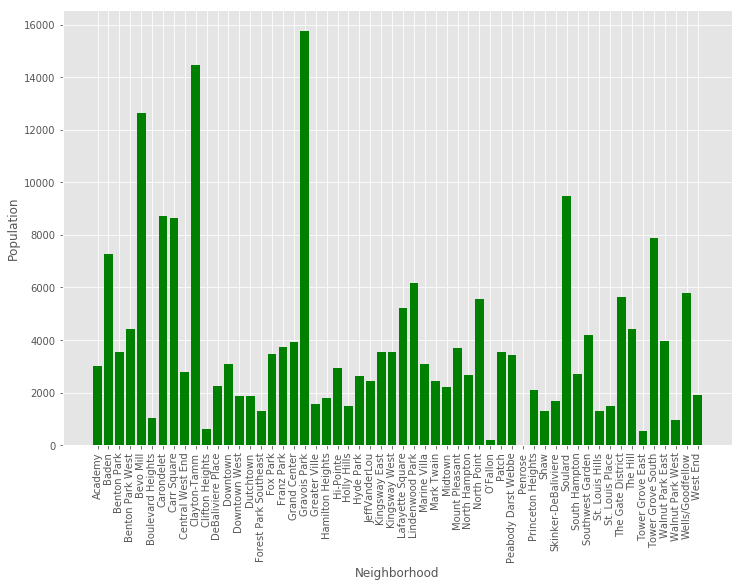

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = stl_shop['Neighborhood']
population = stl_shop['Population']

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(12,8))
plt.bar(x_pos, population, color='green')
plt.xlabel("Neighborhood")
plt.ylabel("Population")

plt.xticks(x_pos, x)
plt.xticks(rotation=90)

plt.show()

Discending order the shop frequencies.

In [33]:
stl_shop2 = stl_shop.sort_values(by='Sum', ascending=False)
stl_shop2.head()

,Neighborhood,Population,Arts & Crafts Store,Candy Store,Clothing Store,Convenience Store,Discount Store,Electronics Store,Fruit & Vegetable Store,Grocery Store,Liquor Store,Men's Store,Music Store,Pet Store,Shoe Store,Thrift / Vintage Store,Toy / Game Store,Video Game Store,Video Store,Sum
7,Carr Square,8661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000
25,JeffVanderLou,2442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.666667
23,Holly Hills,1484,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.400000
33,Mount Pleasant,3701,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.400000
41,Shaw,1299,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.400000


In [34]:
stl_shop2['Sum'].describe()

count    56.000000
mean      0.145529
std       0.188385
min       0.000000
25%       0.000000
50%       0.095455
75%       0.250000
max       1.000000
Name: Sum, dtype: float64

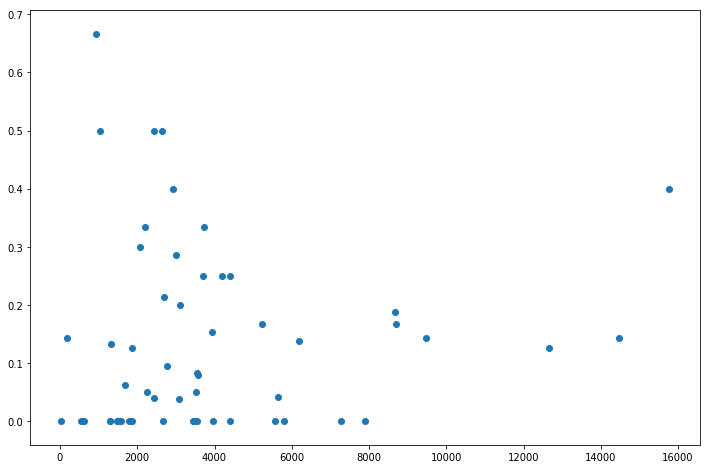

In [50]:
plt.figure(figsize=(12, 8))
X=stl_shop2['Population']
Y=stl_shop2['Sum']
plt.scatter(X,Y)

The relation between store frequency and community population is shown in the scatter plot below. There is no evidence to show that more people indicate more store. The population of some neighborhoods is not large but corresponds a high store frequency, which means that it provides the potential to attractive nearby neighborhoods to shop in these areas and so may indicate more opportunity for eating in a restaurant. 
Based on the overall consideration, we will keep the current 55 neighborhoods to study the restaurant information of each neighborhood in the following study.

Text(0, 0.5, 'Store Frequency')

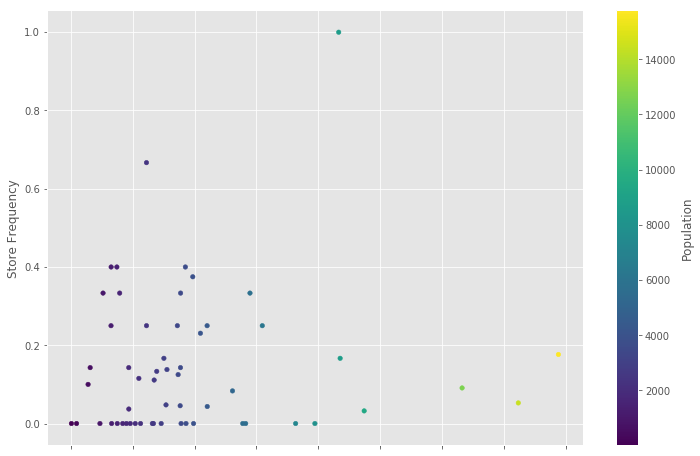

In [35]:
ax2 = stl_shop2.plot.scatter(figsize=(12, 8),
                             x='Population',
                             y='Sum',
                             c='Population',
                             colormap='viridis')
# Set the x-axis label
ax2.set_xlabel("Population")

# Set the y-axis label
ax2.set_ylabel("Store Frequency")

### 4.3 Explore the restaurant in St. Louis

We use the Fousquare API to study the current restaurants and their types in St. Louis neighborhoods. In the previous section, we have already analyzed the occurancy of each venues in the neighborhoods. Here, we need to filter the restaurants.

In [36]:
# select columns by name
stl_rest= stl_grouped.filter(like='Restaurant', axis=1)
stl_rest.insert(loc=0, column='Neighborhood', value=stl_grouped['Neighborhood'])
stl_rest.insert(loc=1, column='Population', value=df3['Population'])
stl_rest.head()

,Neighborhood,Population,American Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,...,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Academy,3006,0.000000,0.0,0.000000,0.0,0.333333,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,Baden,7268,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.250000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,Benton Park,3532,0.045455,0.0,0.045455,0.0,0.000000,0.000000,0.0,0.045455,...,0.0,0.000000,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.0
3,Benton Park West,4404,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,Bevo Mill,12654,0.000000,0.0,0.000000,0.0,0.000000,0.090909,0.0,0.000000,...,0.0,0.090909,0.0,0.000000,0.181818,0.0,0.0,0.0,0.0,0.0


In [37]:
stl_rest.shape

(56, 27)

Get the total frequency of restaurants in each neighborhood

In [107]:
stl_rest["Sum"]=stl_rest.iloc[:,2:25].sum(axis=1)
stl_rest.head()

F:\Han_Simulations\Anaconda\Anacoda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Neighborhood,Population,American Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,...,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Sum
0,Academy,3006,0.000000,0.0,0.000000,0.0,0.333333,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333
1,Baden,7268,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.250000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.250000
2,Benton Park,3532,0.045455,0.0,0.045455,0.0,0.000000,0.000000,0.0,0.045455,...,0.000000,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.0,0.227273
3,Benton Park West,4404,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,Bevo Mill,12654,0.000000,0.0,0.000000,0.0,0.000000,0.090909,0.0,0.000000,...,0.090909,0.0,0.000000,0.181818,0.0,0.0,0.0,0.0,0.0,0.545455


Discending order the restaurant frequencies.

In [39]:
stl_rest2 = stl_rest.sort_values(by='Sum', ascending=False)
stl_rest2.head()

,Neighborhood,Population,American Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,...,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Sum
24,Hyde Park,2632,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.666667
17,Franz Park,3721,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.666667
4,Bevo Mill,12654,0.000000,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,...,0.090909,0.0,0.000000,0.181818,0.0,0.0,0.0,0.0,0.0,0.545455
27,Kingsway West,3562,0.500000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.500000
35,North Point,5557,0.000000,0.0,0.0,0.0,0.2,0.000000,0.0,0.2,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.400000


Statistically analyzing the sum of the restaurant occurancy.

In [40]:
stl_rest2['Sum'].describe()

count    56.000000
mean      0.161028
std       0.168508
min       0.000000
25%       0.000000
50%       0.139423
75%       0.250000
max       0.666667
Name: Sum, dtype: float64

Visualizing the relation between the neighborhood population, the restaurant frequency and the shop frequency using bubble chart.

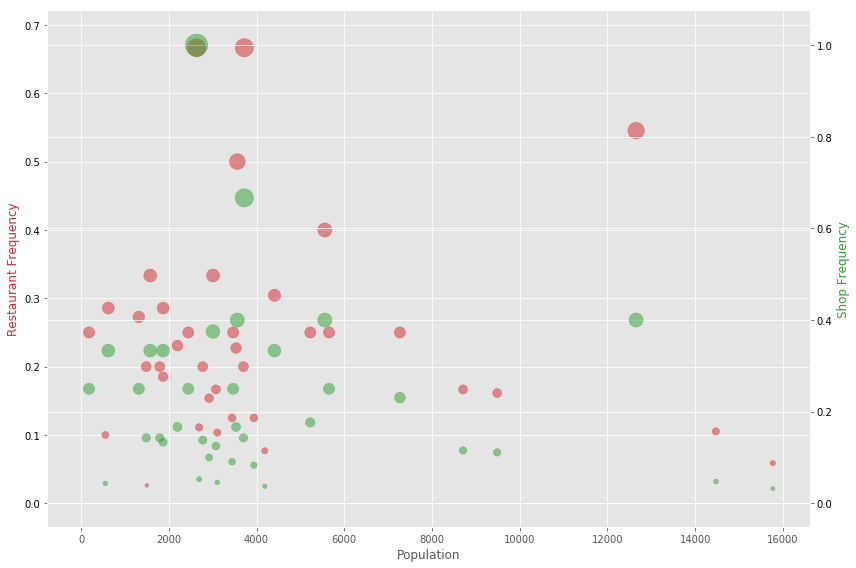

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = stl_rest2['Population']
data1 = stl_rest2['Sum']
data2 = stl_shop2['Sum']
z = np.random.rand(55)


fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:red'
ax1.set_xlabel('Population')
ax1.set_ylabel('Restaurant Frequency', color=color)
ax1.scatter(t, data1, s=data1*500, alpha=0.5, color=color)
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Shop Frequency', color=color)  # we already handled the x-label with ax1
ax2.scatter(t, data2, s=data2*500, alpha=0.5, color=color)
ax2.tick_params(axis='y', labelcolor='black')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The plot shows that in some neighborhoods with a large number of population can corresponds to a high frequency of restaurants and shops. However, there is no linear tendancy to show the increase of population leading to a rise of frequency of shops and restauratns. Therefore, the shop frequency will work as a reference parameter for the selection of location to open a Chinese restaurant. 

##### Clustering the neighborhoods

Write a function to sort the venues in descending order

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [43]:
stl_rest_drop = stl_rest.drop(['Population','Sum'], 1)
stl_rest_drop.head()

,Neighborhood,American Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,...,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Academy,0.000000,0.0,0.000000,0.0,0.333333,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,Baden,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.250000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,Benton Park,0.045455,0.0,0.045455,0.0,0.000000,0.000000,0.0,0.045455,0.0,...,0.0,0.000000,0.0,0.045455,0.000000,0.0,0.0,0.0,0.0,0.0
3,Benton Park West,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,Bevo Mill,0.000000,0.0,0.000000,0.0,0.000000,0.090909,0.0,0.000000,0.0,...,0.0,0.090909,0.0,0.000000,0.181818,0.0,0.0,0.0,0.0,0.0


In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = stl_rest_drop['Neighborhood']

for ind in np.arange(stl_rest.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(stl_rest_drop.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Academy,Chinese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
1,Baden,Fast Food Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Filipino Restaurant
2,Benton Park,Italian Restaurant,New American Restaurant,Brazilian Restaurant,Fast Food Restaurant,American Restaurant,Restaurant,Seafood Restaurant,Asian Restaurant,Sushi Restaurant,Cajun / Creole Restaurant
3,Benton Park West,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
4,Bevo Mill,Restaurant,Italian Restaurant,German Restaurant,Eastern European Restaurant,Mexican Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Falafel Restaurant


In [45]:
# set number of clusters
kclusters = 5

stl_grouped_clustering = stl_rest_drop.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(stl_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [46]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

stl_merged = df5

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
stl_merged = stl_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

stl_merged.head() # check the last columns!

,Neighborhood,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Dutchtown,15770,38.5819,-90.2456,1,Vietnamese Restaurant,Cajun / Creole Restaurant,German Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant
9,Central West End,14473,38.6396,-90.2550,1,Seafood Restaurant,New American Restaurant,Chinese Restaurant,Vietnamese Restaurant,German Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant
70,Tower Grove South,13333,38.5975,-90.2561,1,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
4,Bevo Mill,12654,38.5845,-90.2667,1,Restaurant,Italian Restaurant,German Restaurant,Eastern European Restaurant,Mexican Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Falafel Restaurant
43,Lindenwood Park,9486,38.5983,-90.3085,1,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


In [47]:
stl_merged.shape

(56, 15)

Visualize the clusters on the map.

In [109]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(stl_merged['Latitude'], stl_merged['Longitude'], stl_merged['Neighborhood'], stl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examine the clusters.

Cluster 1

In [49]:
Cluster_1 = stl_merged.loc[stl_merged['Cluster Labels'] == 0, stl_merged.columns[[0] +[1] + list(range(5, stl_merged.shape[1]))]]
Cluster_1

,Neighborhood,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Franz Park,2442,Greek Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant


In [50]:
Cluster_1.shape

(1, 12)

Cluster 2

In [51]:
Cluster_2 = stl_merged.loc[stl_merged['Cluster Labels'] == 1, stl_merged.columns[[0] +[1] + list(range(5, stl_merged.shape[1]))]]
Cluster_2.head()

,Neighborhood,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Dutchtown,15770,Vietnamese Restaurant,Cajun / Creole Restaurant,German Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant
9,Central West End,14473,Seafood Restaurant,New American Restaurant,Chinese Restaurant,Vietnamese Restaurant,German Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant
70,Tower Grove South,13333,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
4,Bevo Mill,12654,Restaurant,Italian Restaurant,German Restaurant,Eastern European Restaurant,Mexican Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Falafel Restaurant
43,Lindenwood Park,9486,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


In [52]:
Cluster_2.shape

(43, 12)

Cluster 3

In [53]:
Cluster_3 = stl_merged.loc[stl_merged['Cluster Labels'] == 2, stl_merged.columns[[0] +[1] + list(range(5, stl_merged.shape[1]))]]
Cluster_3.head()

,Neighborhood,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,Mount Pleasant,4408,American Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
33,Holly Hills,3701,American Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
38,Kingsway West,3441,American Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
30,Hamilton Heights,3105,American Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
12,Clifton Heights,3074,Italian Restaurant,American Restaurant,Sushi Restaurant,German Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant


In [54]:
Cluster_3.shape

(6, 12)

Cluster 4

In [55]:
Cluster_4 = stl_merged.loc[stl_merged['Cluster Labels'] == 3, stl_merged.columns[[0] +[1] + list(range(5, stl_merged.shape[1]))]]
Cluster_4.head()

,Neighborhood,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Greater Ville,6189,Chinese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
54,O’Fallon,5791,Chinese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
45,Mark Twain,4188,Chinese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
52,North Point,3966,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant,Filipino Restaurant
0,Academy,3006,Chinese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


In [56]:
Cluster_4.shape

(5, 12)

Cluster 5

In [57]:
Cluster_5 = stl_merged.loc[stl_merged['Cluster Labels'] == 4, stl_merged.columns[[0] +[1] + list(range(5, stl_merged.shape[1]))]]
Cluster_5

,Neighborhood,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Hyde Park,2668,American Restaurant,New American Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant


### 4.4 Comprehenvisely analyze the restaurant information with the shop as reference in each cluster.

Now, we have clusted the neighborhoods in 5 groups based on the restaurant. The next step is including the influences of the shop. Filter the shop information for each clusters. 

Cluster_1

In [58]:
c1_stl_shop = stl_shop2
Cluster_1_shop = c1_stl_shop.loc[c1_stl_shop['Neighborhood'].isin(Cluster_1['Neighborhood'])]
Cluster_1_merge = Cluster_1_shop[['Neighborhood','Sum']]
Cluster_1_merge = Cluster_1_merge.rename(columns={'Sum': 'Shop Frequency'})
Cluster_1_merge = Cluster_1_merge.join(Cluster_1.set_index('Neighborhood'), on='Neighborhood')
Cluster_1_merge

,Neighborhood,Shop Frequency,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Franz Park,0.0,2442,Greek Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant


In Cluster_1, there is only one neighborhood, Franz Park. Chinese restaurant is the 7th most common venue of total restaurants, which means that open a new Chinese restaurant is still possible. However, the decision needs to include the shop frequency and population. The population of this neighborhood in 2442. Compared to other neighborhoods, the population is small. Besides, there is no shop in this neighborhood, which indicates that floating population is at low potential. Therefore, it is not a good opinion to open a new Chinese restaurant in Cluster_1. 

Cluster_2

In [111]:
c2_stl_shop = stl_shop2
Cluster_2_shop = c2_stl_shop.loc[c2_stl_shop['Neighborhood'].isin(Cluster_2['Neighborhood'])]
Cluster_2_merge = Cluster_2_shop[['Neighborhood','Sum']]
Cluster_2_merge = Cluster_2_merge.rename(columns={'Sum': 'Shop Frequency'})
Cluster_2_merge = Cluster_2_merge.join(Cluster_2.set_index('Neighborhood'), on='Neighborhood')
Cluster_2_merge = Cluster_2_merge.sort_values(by='Population', ascending=False)
Cluster_2_merge

,Neighborhood,Shop Frequency,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Dutchtown,0.142857,15770,Vietnamese Restaurant,Cajun / Creole Restaurant,German Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant
8,Central West End,0.133333,14473,Seafood Restaurant,New American Restaurant,Chinese Restaurant,Vietnamese Restaurant,German Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant
51,Tower Grove South,0.000000,13333,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
4,Bevo Mill,0.090909,12654,Restaurant,Italian Restaurant,German Restaurant,Eastern European Restaurant,Mexican Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Falafel Restaurant
29,Lindenwood Park,0.250000,9486,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
5,Boulevard Heights,0.333333,8708,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
6,Carondelet,0.166667,8661,Fast Food Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Filipino Restaurant
34,North Hampton,0.000000,7892,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
40,Princeton Heights,0.000000,7619,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
46,St. Louis Hills,0.250000,7373,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


In [60]:
Cluster_2_merge.shape

(43, 13)

There are total 43 neighborhoods. To help quicker filter the possible options for opening a new Chinese restaurant, we first excludes the regions that has a population lower than average and the shop frequency lower than average. 

In [66]:
Cluster_2_merge_p = Cluster_2_merge[(Cluster_2_merge['Population'] >= 4044)]
Cluster_2_merge_p.tail()

,Neighborhood,Shop Frequency,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Gravois Park,0.176471,5225,Southern / Soul Food Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant
45,Southwest Garden,0.230769,4885,Italian Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
3,Benton Park West,0.250000,4404,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
52,Walnut Park East,0.000000,4130,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
42,Skinker-DeBaliviere,0.000000,4077,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


In [75]:
Cluster_2_merge_p.shape

(24, 13)

Firstly, considering the neighborhoods that have a population larger than 10,000. Dutchtown has the largest population and a good shop frequency. Chinese restaurant is the 7th common venue. It is a good choice to be selected as the candidate. Through Central West End has the 2nd largest population and a relative good shop frequency, the present Chinese restaurant is the 3rd most common venue. The neighborhood is not considered as a good choice due to high possibility of competition. The 3rd and 4th largest population communities have similar case with Dutchtown, however, it is not as good as Dutchtown. Therefore, with population larger than 10,000, **Dutchtwon** is considered as a good candidate to open a restaurant. 

In [74]:
Cluster_2_merge_p.head()

,Neighborhood,Shop Frequency,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Dutchtown,0.142857,15770,Vietnamese Restaurant,Cajun / Creole Restaurant,German Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant
8,Central West End,0.133333,14473,Seafood Restaurant,New American Restaurant,Chinese Restaurant,Vietnamese Restaurant,German Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant
51,Tower Grove South,0.000000,13333,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
4,Bevo Mill,0.090909,12654,Restaurant,Italian Restaurant,German Restaurant,Eastern European Restaurant,Mexican Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Falafel Restaurant
29,Lindenwood Park,0.250000,9486,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


For population less than 10,000, considering the shop frequency larger than average shop frequency in St. Louis. 

In [76]:
Cluster_2_merge_ps = Cluster_2_merge_p[(Cluster_2_merge_p['Shop Frequency'] >= 0.145592)]
Cluster_2_merge_ps

,Neighborhood,Shop Frequency,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Lindenwood Park,0.250000,9486,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
5,Boulevard Heights,0.333333,8708,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
6,Carondelet,0.166667,8661,Fast Food Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Filipino Restaurant
46,St. Louis Hills,0.250000,7373,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
41,Shaw,0.400000,6811,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
54,Wells/Goodfellow,0.333333,5859,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
25,JeffVanderLou,0.666667,5557,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
19,Gravois Park,0.176471,5225,Southern / Soul Food Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant
45,Southwest Garden,0.230769,4885,Italian Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
3,Benton Park West,0.250000,4404,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


In [70]:
Cluster_2_merge_ps.shape

(10, 13)

**Lindenwood Park** and **Boulevard Heights** have close population and shop frequency. They also can be considered as candidates. Benton Park West and St. Louis Hills have the same shop frequency with Lindenwood Park, however, the population of them are less than Lindenwood Park. Hence Benton Park West and St. Louis Hills are excluded from the candidates. Carondelet has less population and shop frequency tha Lindenwood Park, thus exclues it. Wells/Goodfellow and JeffVanderLou have similar population, but JeffVanderLou has twice higher shop frequency. Therefore, **JeffVanderLou** is selected as candidates. **Shaw** has a relative higher shop frequency but smaller population, can only be listed as a candidate. 

Cluster_3

In [92]:
c3_stl_shop = stl_shop2
Cluster_3_shop = c3_stl_shop.loc[c3_stl_shop['Neighborhood'].isin(Cluster_3['Neighborhood'])]
Cluster_3_merge = Cluster_3_shop[['Neighborhood','Sum']]
Cluster_3_merge = Cluster_3_merge.rename(columns={'Sum': 'Shop Frequency'})
Cluster_3_merge = Cluster_3_merge.join(Cluster_3.set_index('Neighborhood'), on='Neighborhood')
Cluster_3_merge = Cluster_3_merge.sort_values(by='Population', ascending=False)
Cluster_3_merge

,Neighborhood,Shop Frequency,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Mount Pleasant,0.400000,4408,American Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
23,Holly Hills,0.400000,3701,American Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
27,Kingsway West,0.000000,3441,American Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
21,Hamilton Heights,0.000000,3105,American Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
10,Clifton Heights,0.142857,3074,Italian Restaurant,American Restaurant,Sushi Restaurant,German Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant
38,Peabody Darst Webbe,0.250000,2378,American Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


In [93]:
Cluster_3_merge.shape

(6, 13)

There are six neighborhoods in Cluster 3. The most three popular restaurants are American Restaurant, Greek Restaruant, and Asian Restauratn in this Cluster 4. The population of neighborhoods is less than 5000, which is less than the average population of St. Louis. Additionally, the shop frequencies of three neighborhoods are larger than average shop frequency in St. Louis. In this cluster, Mount Pleasant may be considered as candidates to open a new Chinese restaurant. 

Cluster_4

In [158]:
c4_stl_shop = stl_shop2
Cluster_4_shop = c4_stl_shop.loc[c4_stl_shop['Neighborhood'].isin(Cluster_4['Neighborhood'])]
Cluster_4_merge = Cluster_4_shop[['Neighborhood','Sum']]
Cluster_4_merge = Cluster_4_merge.rename(columns={'Sum': 'Shop Frequency'})
Cluster_4_merge = Cluster_4_merge.join(Cluster_4.set_index('Neighborhood'), on='Neighborhood')
Cluster_4_merge = Cluster_4_merge.sort_values(by='Population', ascending=False)
Cluster_4_merge

,Neighborhood,Shop Frequency,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Greater Ville,0.333333,6189,Chinese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
36,O’Fallon,0.000000,5791,Chinese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
31,Mark Twain,0.250000,4188,Chinese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
35,North Point,0.000000,3966,Chinese Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant,Filipino Restaurant
0,Academy,0.166667,3006,Chinese Restaurant,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


There are total five neighborhood in this cluster. Chinese restaurants are the most common venue in this cluster. It means that open a new Chinese restaurant in the neighborhoods of this cluster is not a sensible choice due to the high potential of competition. Therefore, the neighborhoods in Cluster_4 are not considered as optimum choices of open a new Chinese restaurant.

In [ ]:
Cluster_5

In [159]:
c5_stl_shop = stl_shop2
Cluster_5_shop = c5_stl_shop.loc[c5_stl_shop['Neighborhood'].isin(Cluster_5['Neighborhood'])]
Cluster_5_merge = Cluster_5_shop[['Neighborhood','Sum']]
Cluster_5_merge = Cluster_5_merge.rename(columns={'Sum': 'Shop Frequency'})
Cluster_5_merge = Cluster_5_merge.join(Cluster_5.set_index('Neighborhood'), on='Neighborhood')
Cluster_5_merge = Cluster_5_merge.sort_values(by='Population', ascending=False)
Cluster_5_merge

,Neighborhood,Shop Frequency,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Hyde Park,0.0,2668,American Restaurant,New American Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant


There is only one neighborhood in Cluster 5. American restaurants are more popular in this neighborhood. Like the case in Cluster 1, even there is still potential to open a Chinese restaurant in this region, however, the poplation and shop frequency is not as expected. Therefore, Hyde Park is not considered as the prospective neighborhood. 

List the candidates in a table to do the final decision.

In [87]:
df6 = Cluster_2_merge_p.iloc[[0]]
df6

,Neighborhood,Shop Frequency,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Dutchtown,0.142857,15770,Vietnamese Restaurant,Cajun / Creole Restaurant,German Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant


In [90]:
df7 = Cluster_2_merge_ps.iloc[[0,1,4,6]]
df7

,Neighborhood,Shop Frequency,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Lindenwood Park,0.250000,9486,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
5,Boulevard Heights,0.333333,8708,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
41,Shaw,0.400000,6811,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
25,JeffVanderLou,0.666667,5557,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


In [94]:
df8 = Cluster_3_merge.iloc[[0]]
df8

,Neighborhood,Shop Frequency,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Mount Pleasant,0.4,4408,American Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


In [98]:
df_comb = df6.append(df7, ignore_index=True)
df_comb1 = df_comb.append(df8, ignore_index=True)
df_comb1

,Neighborhood,Shop Frequency,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dutchtown,0.142857,15770,Vietnamese Restaurant,Cajun / Creole Restaurant,German Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant
1,Lindenwood Park,0.250000,9486,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
2,Boulevard Heights,0.333333,8708,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
3,Shaw,0.400000,6811,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
4,JeffVanderLou,0.666667,5557,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
5,Mount Pleasant,0.400000,4408,American Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


Since Mount Pleasant has the same shop frequency with Shaw, but less population, thus we drop Mount Pleasant from candidates. The final five optiions to open a new Chinese restaurant is shown below.

In [99]:
df_comb

,Neighborhood,Shop Frequency,Population,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dutchtown,0.142857,15770,Vietnamese Restaurant,Cajun / Creole Restaurant,German Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant
1,Lindenwood Park,0.250000,9486,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
2,Boulevard Heights,0.333333,8708,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
3,Shaw,0.400000,6811,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant
4,JeffVanderLou,0.666667,5557,Vietnamese Restaurant,Greek Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant


## Conclusion

The objective of this project is provide the stockholders candidates for opening a new Chinese restaurant in St. Louis. Based on the above study and analysis, five candidate neighborhoods were finally selected based on the consideration of population and shop frequency. The five candidate neighborhoods are **Dutchtown**, **Lindenwood Park**, **Boulevard Heights**, **Shaw**, **JeffVanderLou**. The population works as the most important factor for the selection of the neighborhoods to open a new Chinese restaurant, since population represents the fixed the possibility of the potential customers. At the same time, the shop frequency is considered as the secondary factor for the selection of neighborhoods to open a new Chinese restaurant, as shops can attract floating population which are possible customers. Therefore, the five neighborhoods are chosen for the stockholders as the candidates to open a new Chinese restaurants. 